<a href="https://colab.research.google.com/github/rock16/cereals_image_cnn_classifier/blob/master/Ceraels_image_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To save files, you need to permit your Colaboratory instance to read and write files to your Google Drive. Add the following code snippet at the beginning of every notebook.

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
bs = 64
#bs = 16 
folder = 'wheat'
file = 'urls_wheat.csv'

path = Path('data/grains')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

# Create more paths to data

In [0]:
doc(Path)

In [0]:
folder = 'maize'
file = 'urls_maize.csv'

path = Path('data/grains')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

folder = 'rice'
file = 'urls_rice.csv'

path = Path('data/grains')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [6]:
path.ls()

[PosixPath('data/grains/rice'),
 PosixPath('data/grains/maize'),
 PosixPath('data/grains/wheat')]

In [0]:
classes = ['rice', 'maize', 'black']
download_images(path/file, dest, max_pics=200)

In [0]:
classes = ['rice', 'maize', 'wheat']
download_images(path/'urls_maize.csv', 'data/grains/maize', max_pics=200)
download_images(path/'urls_wheat.csv', 'data/grains/wheat', max_pics=200)

Verifiy images that cannot be opened

In [11]:
for c in classes:
  print(c)
  verify_images(path/c, delete=True, max_size=500)

rice


maize


wheat


View images

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,ds_tfms=get_transforms(),
                                  size=224, num_workers=4).normalize(imagenet_stats)

In [13]:
data.classes

['maize', 'rice', 'wheat']

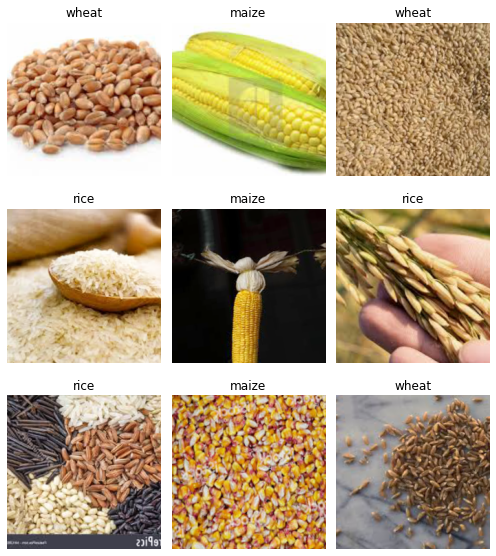

In [14]:
data.show_batch(rows=3, figsize=(7, 8))

In [15]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['maize', 'rice', 'wheat'], 3, 384, 96)

In [29]:
learn = cnn_learner(data, models.resnet152, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/checkpoints/resnet152-b121ed2d.pth


In [31]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.128807,0.813615,0.187500,00:06
1,0.107482,0.717031,0.166667,00:06
2,0.092110,0.683087,0.187500,00:06
3,0.092695,0.680112,0.177083,00:06


In [32]:
learn.save('stage-1')
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


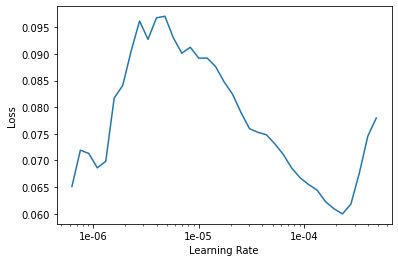

In [34]:
learn.recorder.plot()

In [26]:
doc(learn.lr_find)

In [38]:
learn.fit_one_cycle(3, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.057760,0.645939,0.177083,00:07
1,0.045913,0.604550,0.145833,00:07
2,0.036281,0.598543,0.145833,00:07


In [0]:
learn.save('stage-2');

In [0]:
learn.load('stage-2')

In [43]:
interp = ClassificationInterpretation.from_learner(learn)

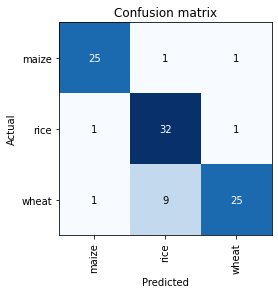

In [44]:
interp.plot_confusion_matrix()

In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(path).split_none().label_from_folder().
      transform(get_transforms(), size=224)
      .databunch())

In [0]:
learn_cln = cnn_learner(db, models.resnet152, metrics=error_rate)
learn_cln.load('stage-2');

In [49]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [0]:
learn.export()

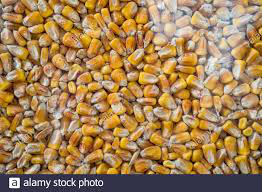

In [51]:
defaults.device = torch.device('cpu')
img = open_image(path/'maize'/'00000021.jpg')
img 

In [52]:
learn_to = load_learner(path)
pred_class, pred_idx, outputs = learn_to.predict(img)
pred_class

Category maize